In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
import os
from tqdm import tqdm
from skimage.morphology import label
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from util import dsutil
%load_ext autoreload
%autoreload 2

In [6]:
%matplotlib inline

In [7]:
TRAIN_PATH = './data/stage1_train/'
TEST_PATH = './data/stage1_test/'

In [58]:
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]
X_train = []
Y_train = []

In [64]:
# for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = cv2.imread(path + '/images/' + id_ + '.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X_train.append(img)
    mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (img.shape[0], img.shape[1]), mode='constant', preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_train.append(mask)


100%|██████████| 670/670 [05:03<00:00,  3.18it/s]


In [78]:
def mult_maskshow(X_train, Y_train):
    max_counter = 150
    counter = 0
    n = 4
    for i, img in enumerate(X_train):
        if counter % n == 0:
            plt.figure(figsize=(14, 6))
            
        plt.subplot(1, n, counter % n + 1)
        plt.imshow(img)
        plt.subplot(1, n , counter % n + 2)
        plt.imshow(np.squeeze(Y_train[i]))
        counter += 2
        
        if counter > max_counter:
            break
        

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


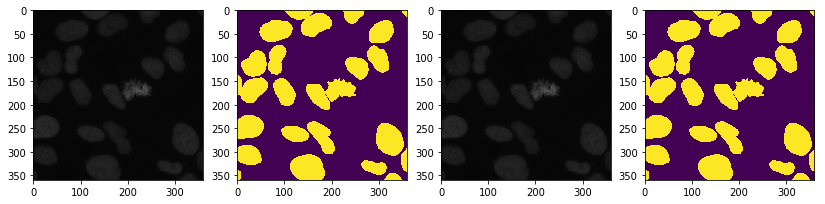

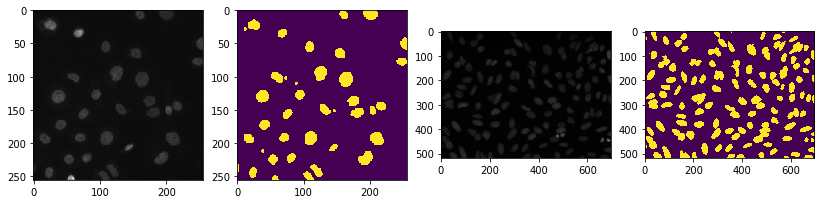

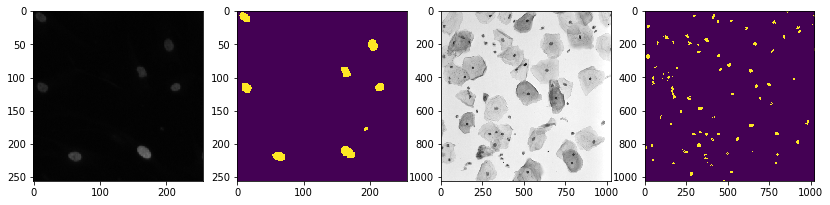

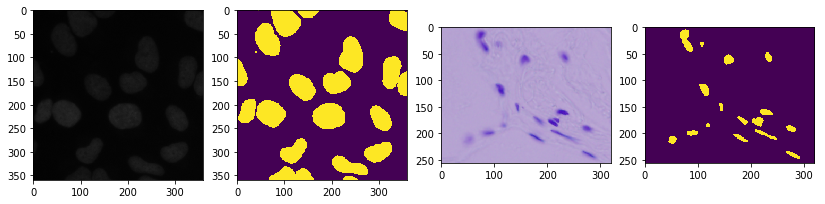

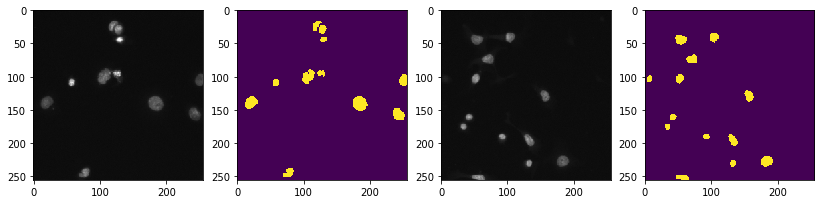

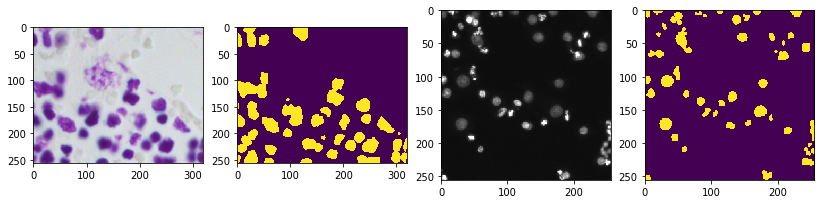

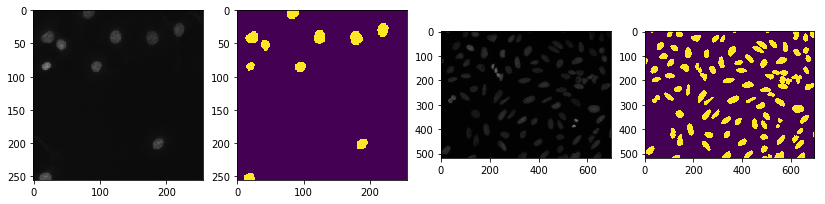

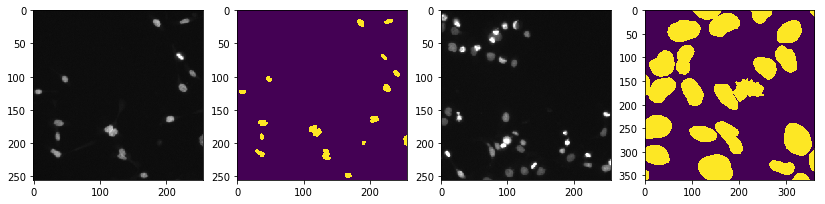

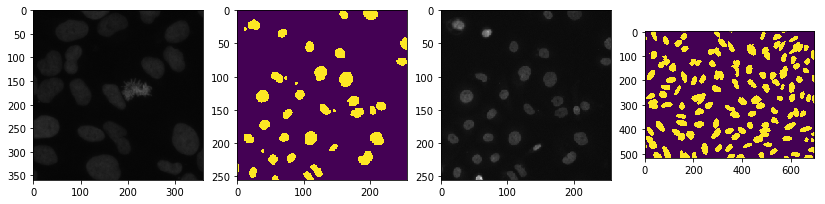

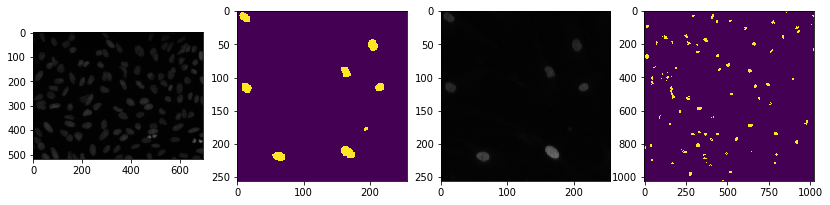

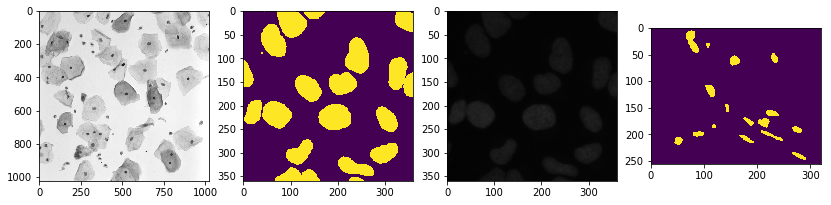

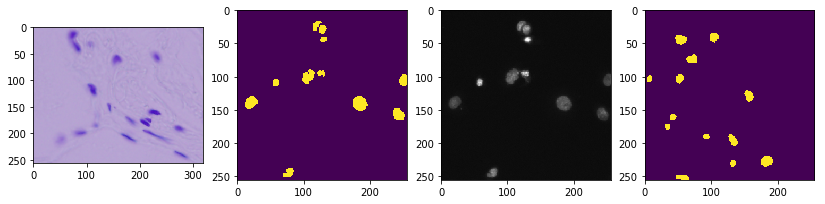

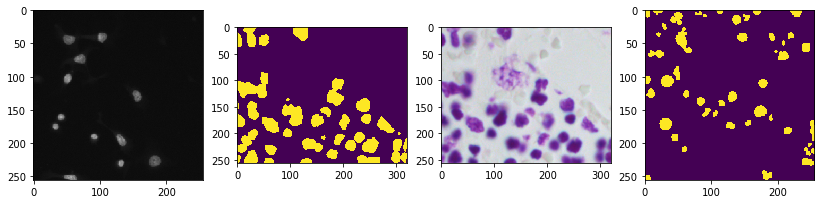

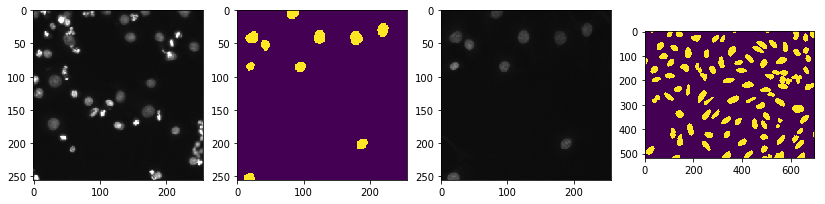

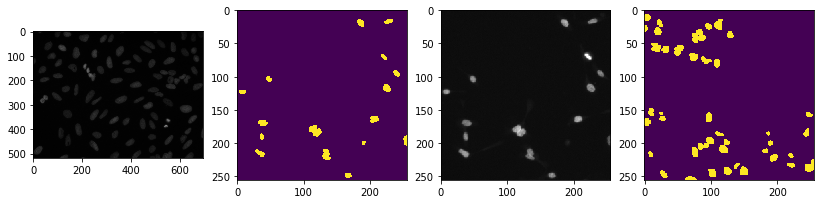

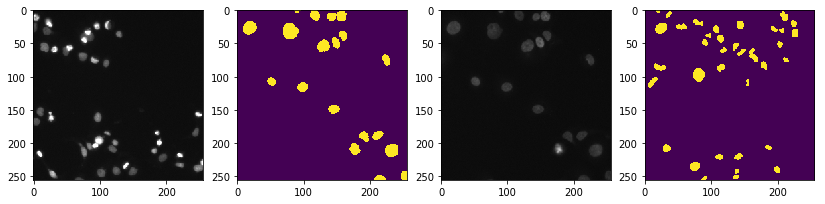

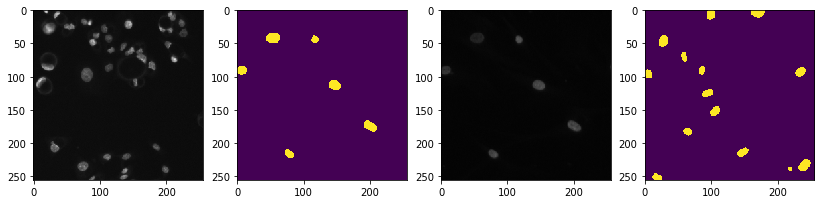

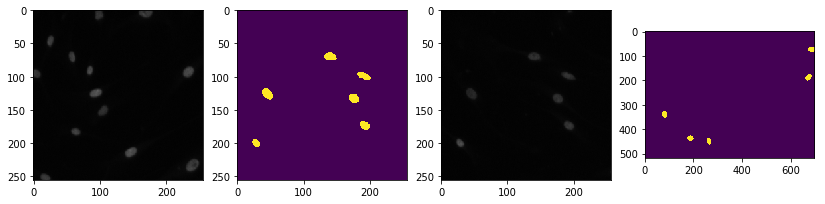

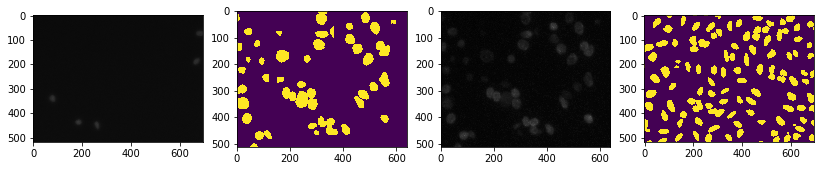

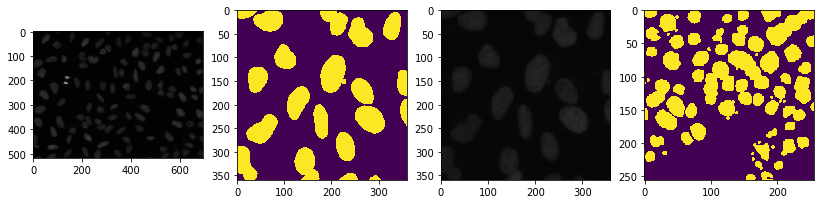

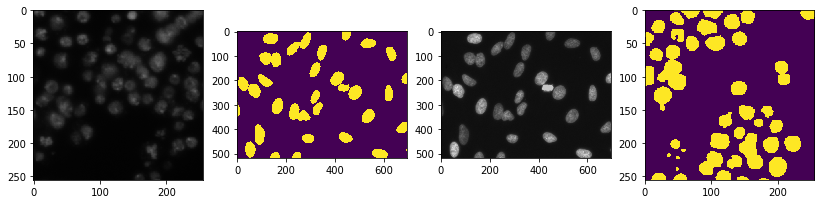

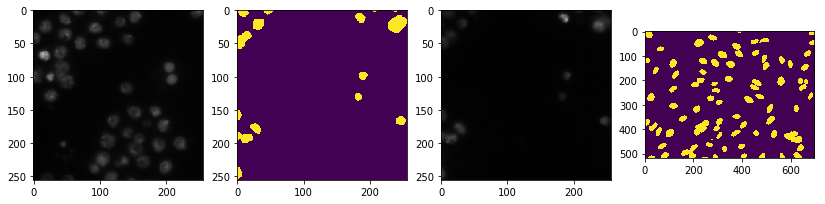

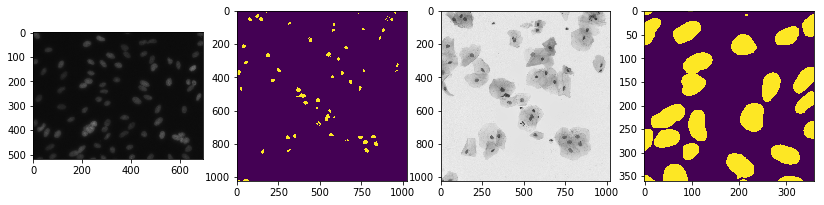

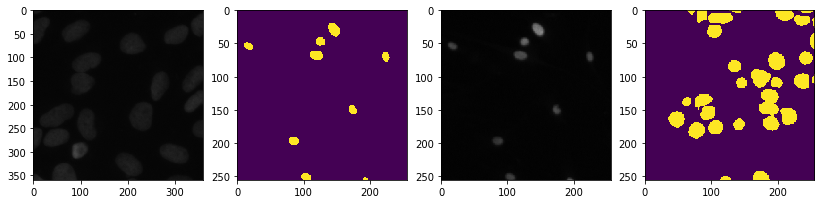

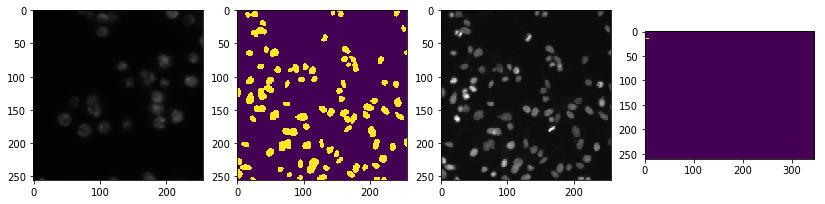

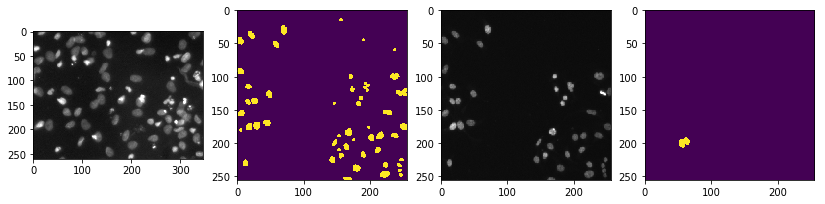

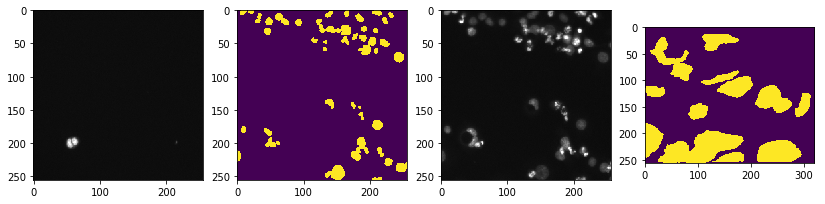

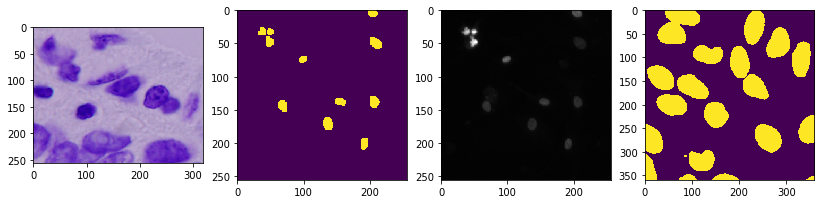

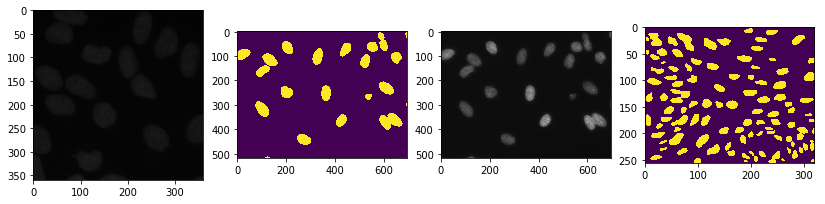

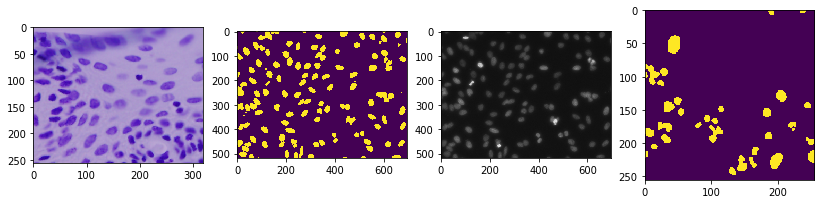

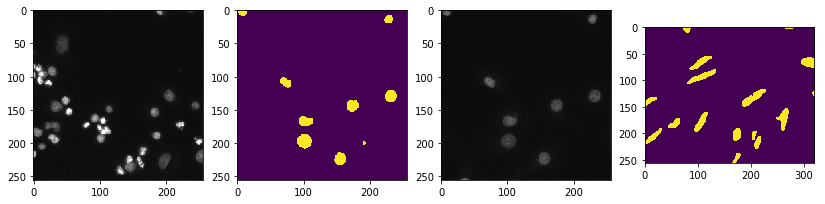

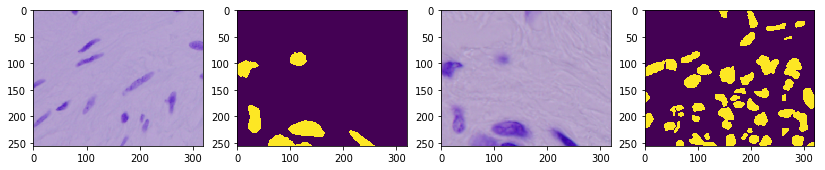

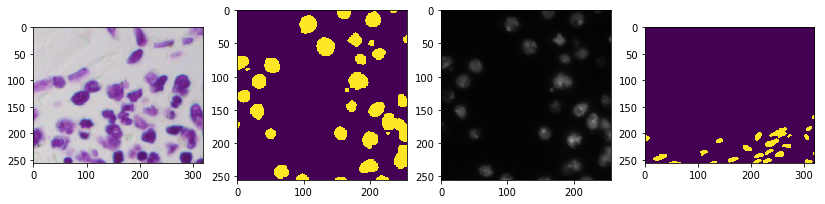

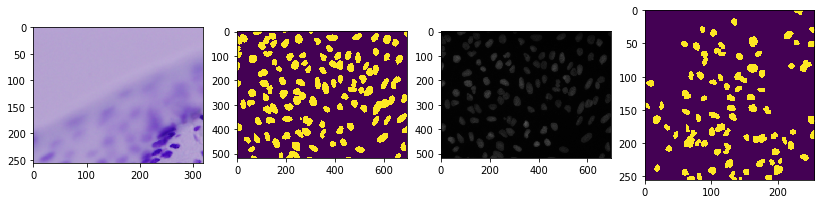

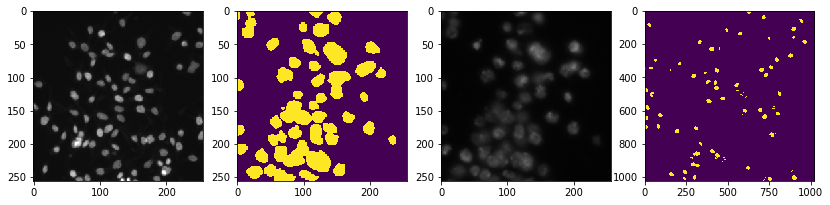

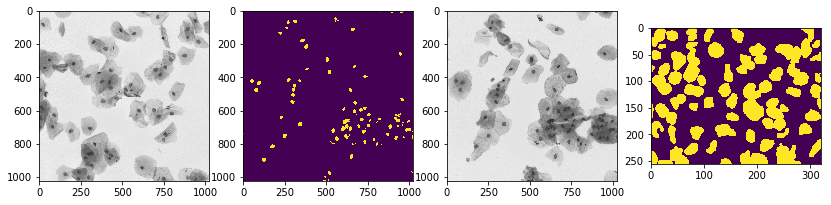

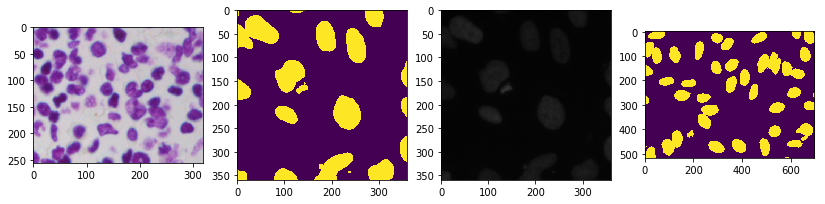

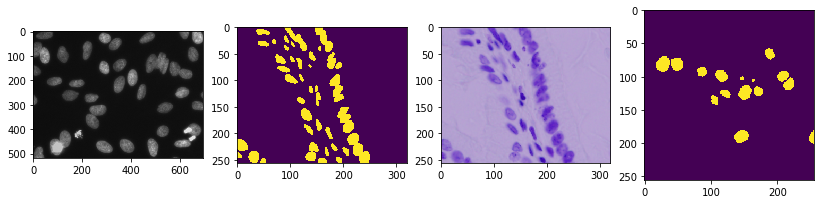

In [79]:
mult_maskshow(X_train, Y_train)

In [92]:
next(os.walk('/home/ubuntu/work/kaggle-ds-bowl-18/data/stage1_train/'))[1]

['7978812d0e2e034ee1f9c141f019705582fcaa290e4a01c6c75a62753285cb23',
 '61a15ccbfebb9d2fc54c068472a75d7babfb3f48fea008470e7db807585f9510',
 'dd54adb80393de7769b9853c0aa2ee9b240905d0e99c59d4ccd99401f327aa05',
 'b3bfd873fca7ff9b2e90f507dfdbe165bb8c153399b6ba5829aa59bae677a91d',
 '4e07a653352b30bb95b60ebc6c57afbc7215716224af731c51ff8d430788cd40',
 '4948e3dfe0483c2198b9616612071ead5474dffd223071cf0a567aea9aca0b9e',
 '673baf65ae5c571d6be452eb41e79ef3fc2eb3fd238e621c6b7621763b429989',
 '3874755f6222e83006fdad4d664ec0d9697c13af4fbe24b2f9a059bb13075186',
 'fec226e45f49ab81ab71e0eaa1248ba09b56a328338dce93a43f4044eababed5',
 '353ab00e964f71aa720385223a9078b770b7e3efaf5be0f66e670981f68fe606',
 '1c681dfa5cf7e413305d2e90ee47553a46e29cce4f6ed034c8297e511714f867',
 '88678981648b184b23b6c04999f29210cbe351f85b61d2bf99e306fd67a2998a',
 '61dc249314d7b965eb4561ec739eab9b0f60af55c97b25ced8cb2a42a0be128e',
 'a101a00fea63f0c43abe5323f4f890bec881eb0caa3bc8498991ff5fd207ed91',
 'eeb142344e9de3250ab748f93940bf06

In [110]:
x, y = dsutil.get_train()

  0%|          | 1/670 [00:00<01:49,  6.13it/s]

/home/ubuntu/work/kaggle-ds-bowl-18/data/stage1_train/


100%|██████████| 670/670 [05:00<00:00,  3.10it/s]


In [49]:
mask = np.zeros((100, 100, 1), dtype=np.bool)

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


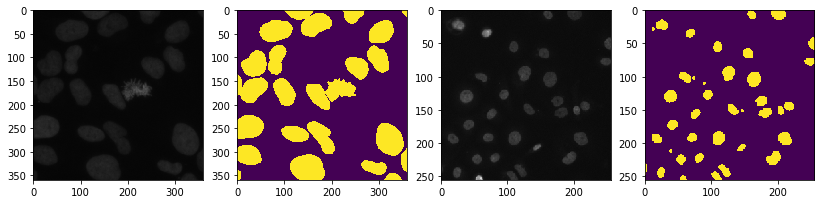

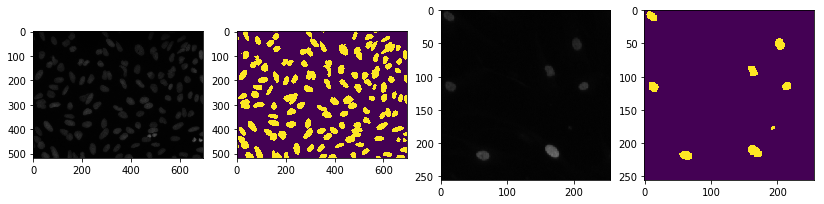

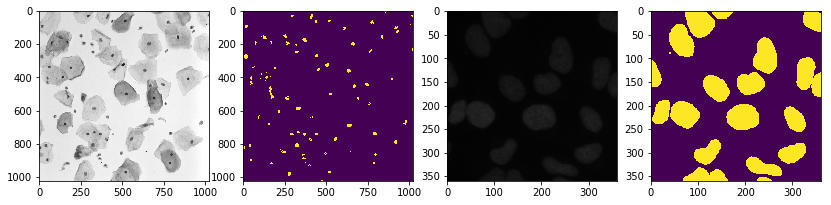

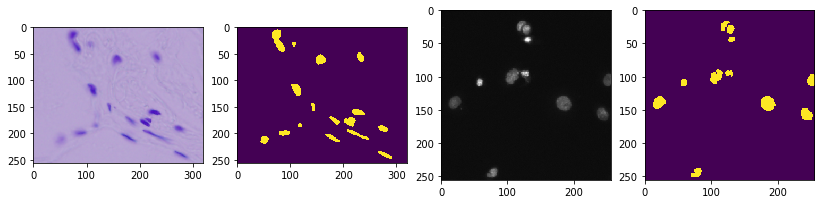

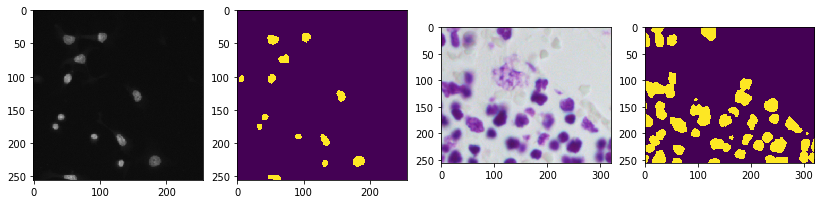

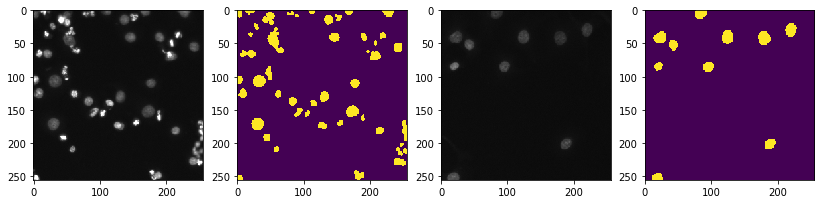

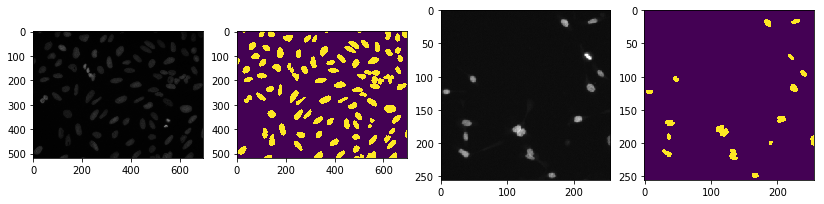

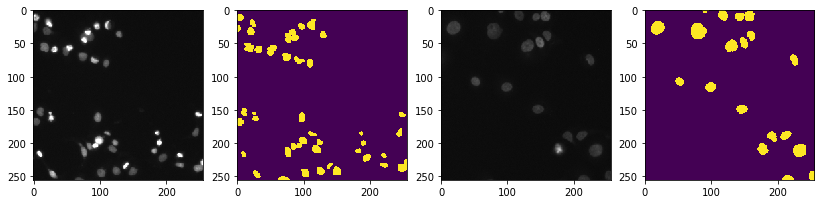

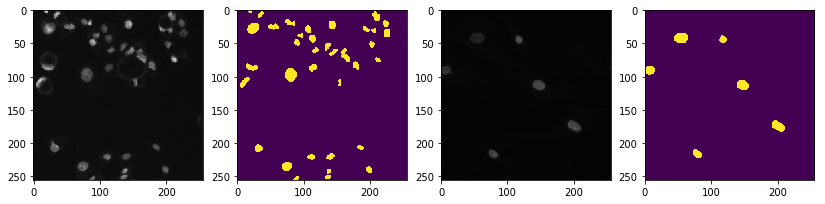

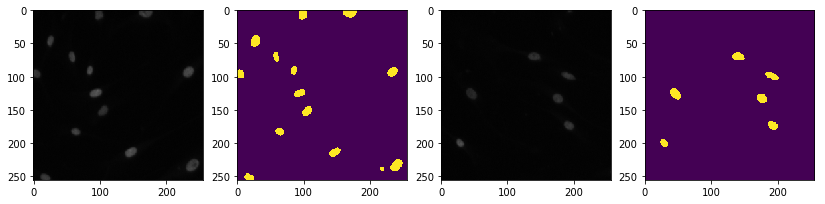

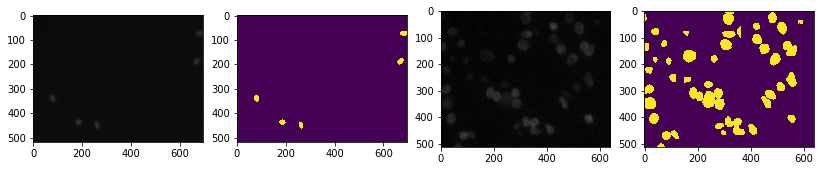

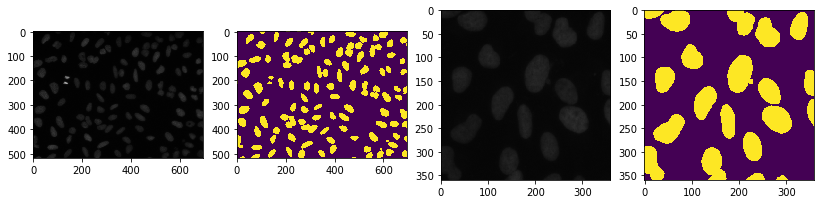

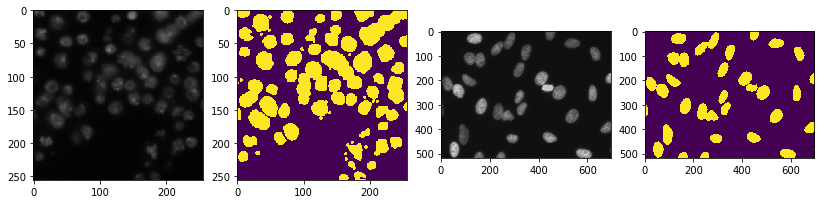

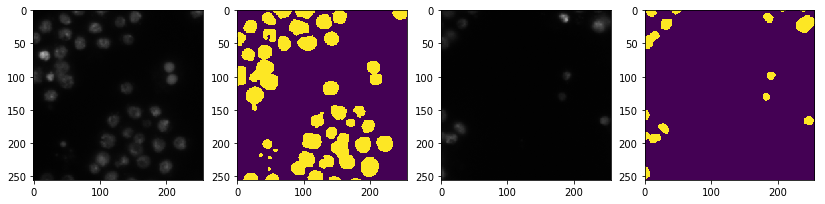

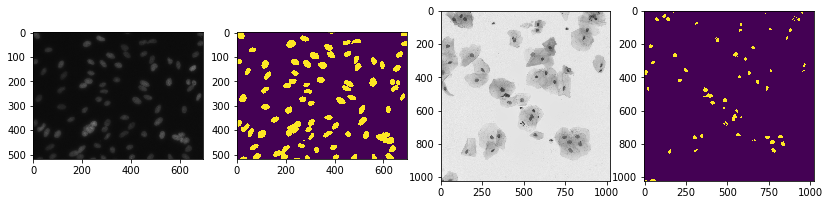

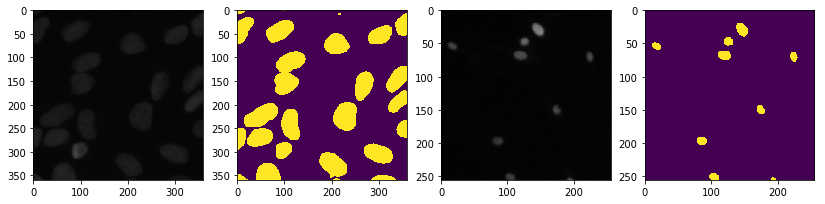

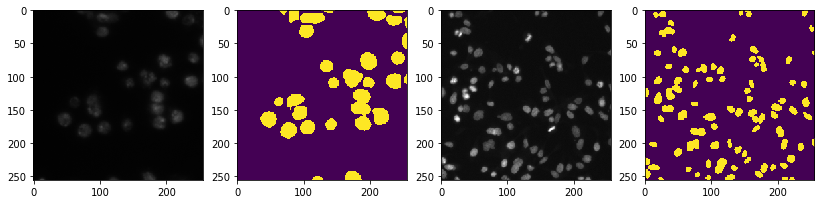

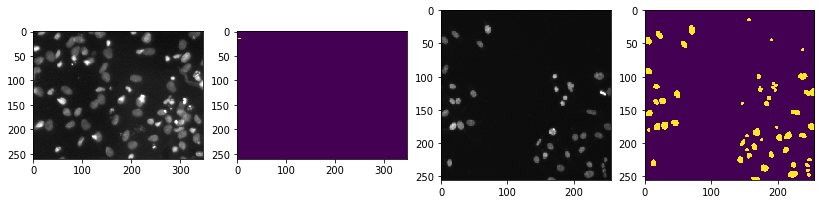

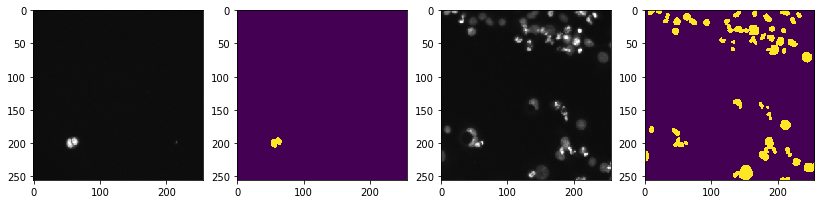

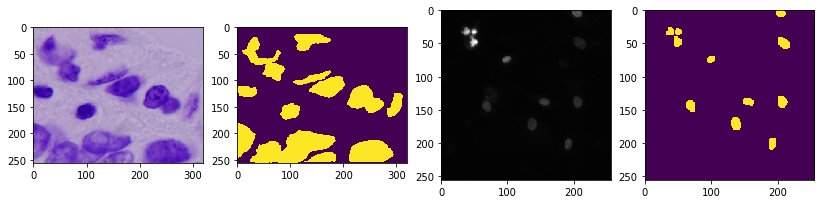

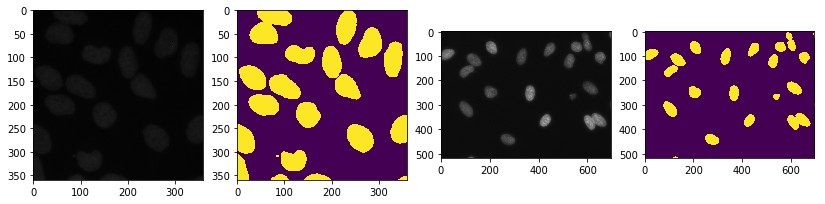

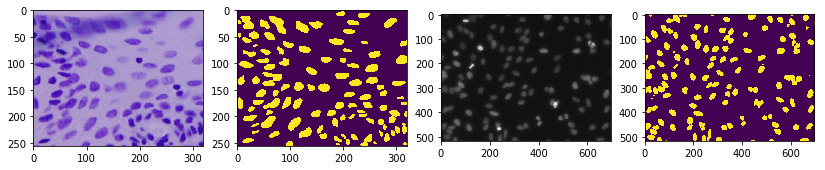

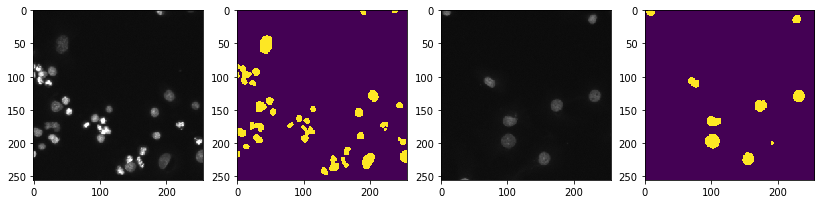

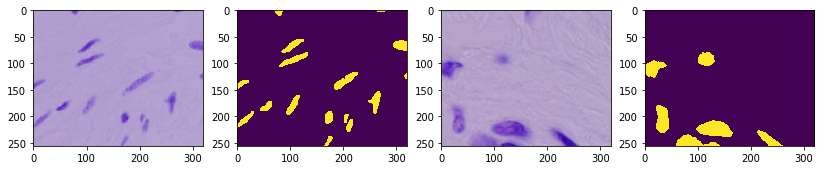

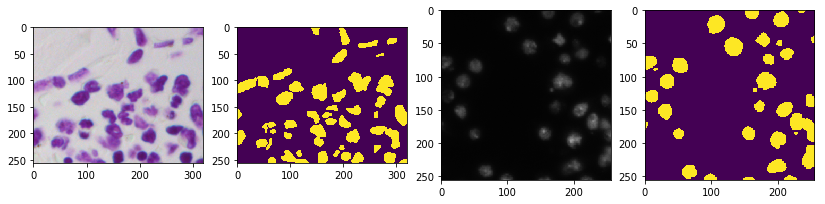

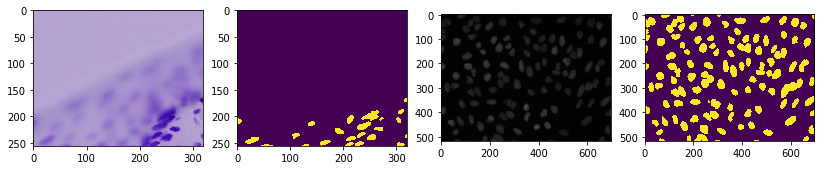

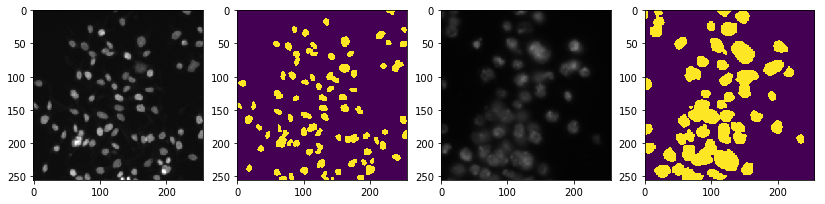

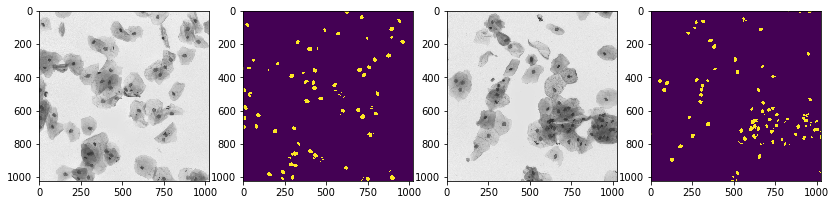

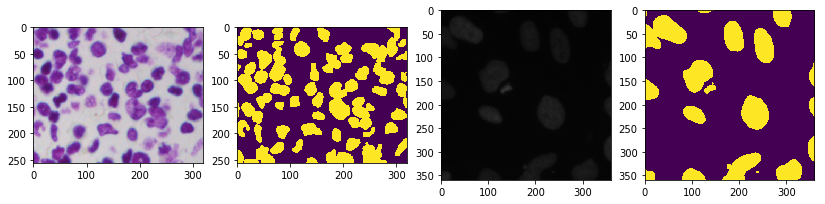

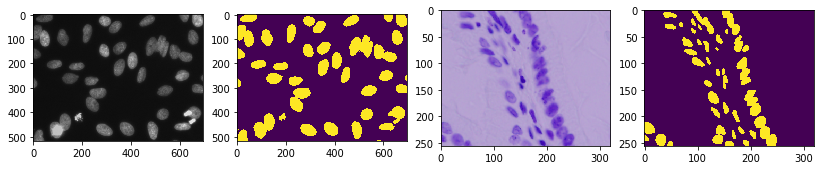

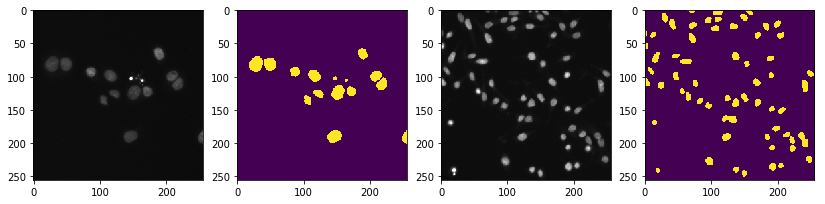

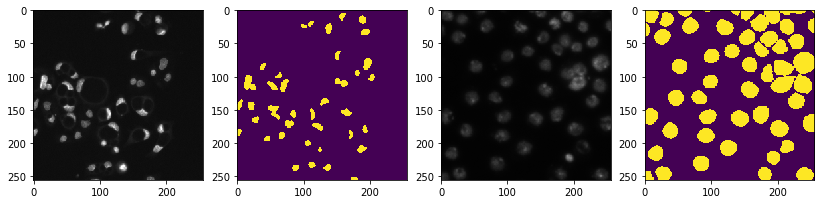

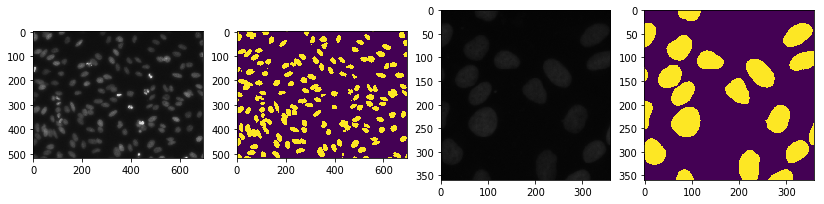

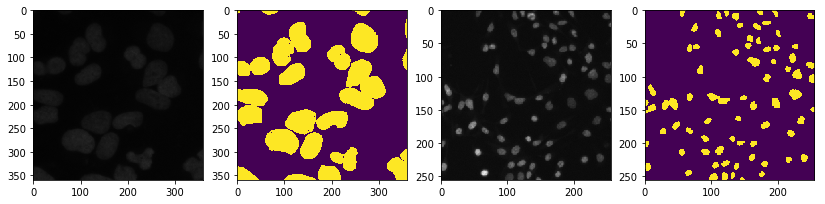

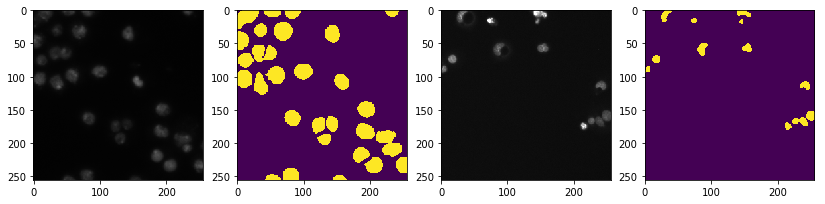

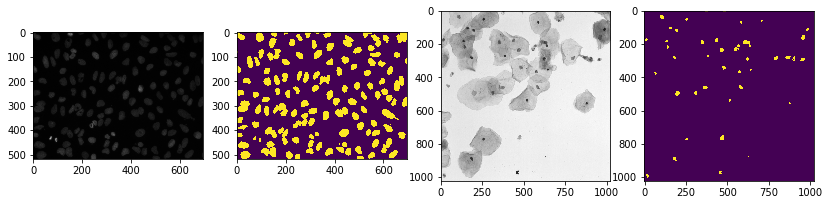

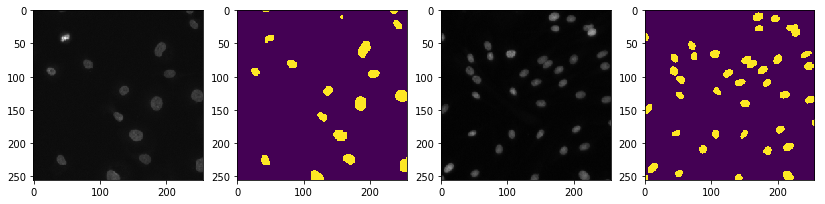

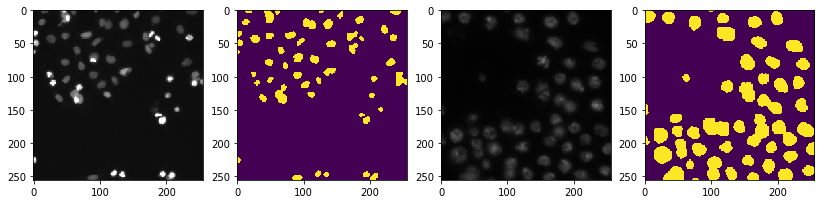

In [111]:
dsutil.multi_maskshow(x, y)

In [117]:
shape_list = []
for i in x:
    shape_str = str(i.shape[0]) + '_' + str(i.shape[1])
    shape_list.append(shape_str)

In [123]:
df = pd.DataFrame(shape_list)

In [132]:
df[0].value_counts()

256_256      334
256_320      112
520_696       92
360_360       91
1024_1024     16
512_640       13
603_1272       6
260_347        5
1040_1388      1
Name: 0, dtype: int64

In [138]:
tests = dsutil.get_test()

100%|██████████| 65/65 [00:00<00:00, 153.83it/s]


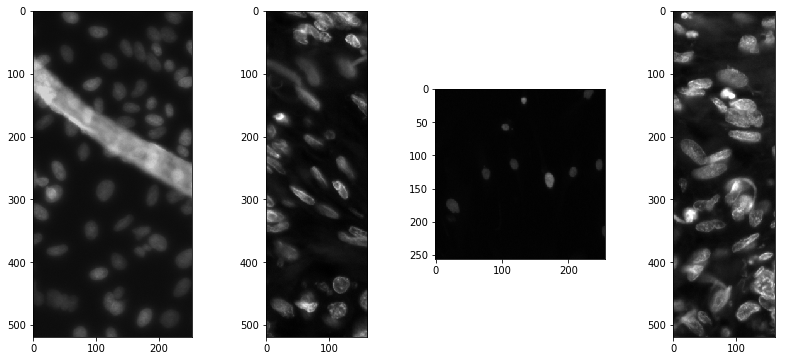

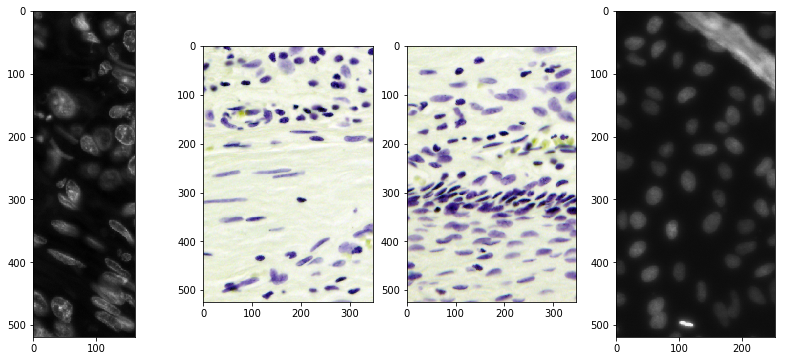

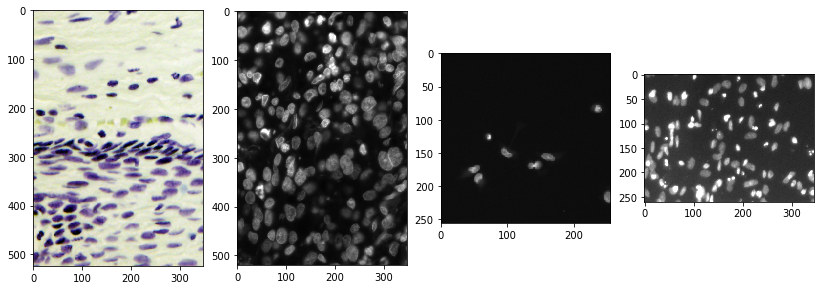

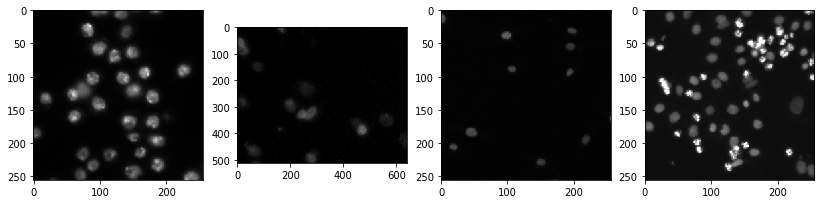

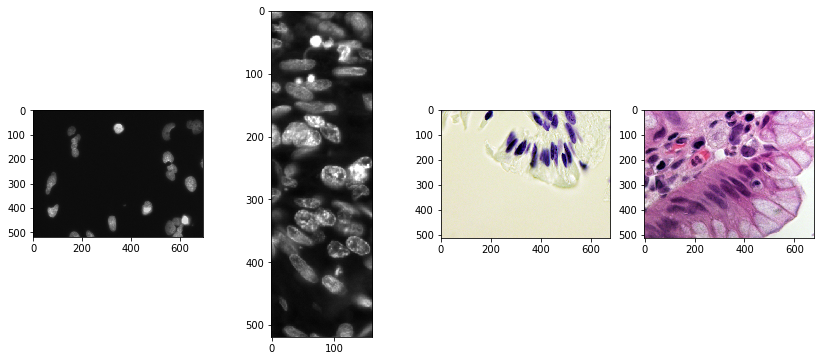

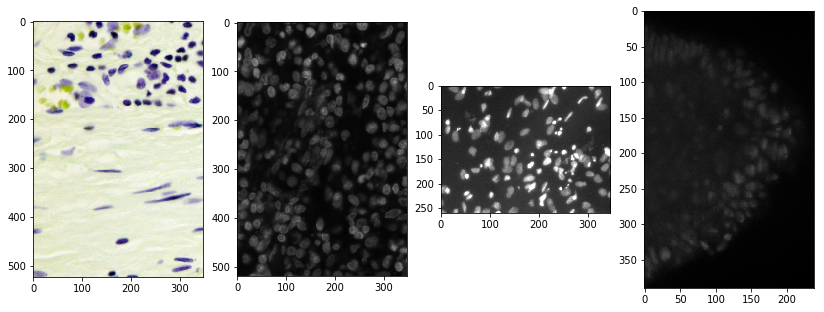

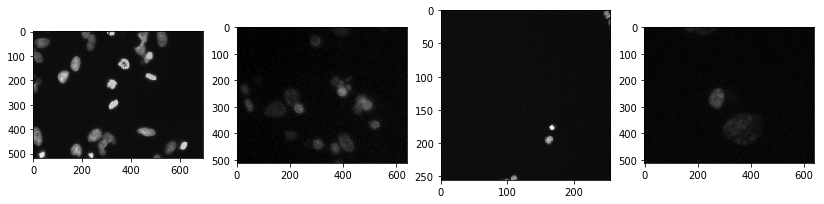

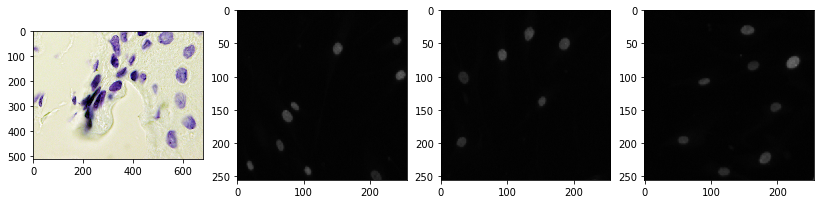

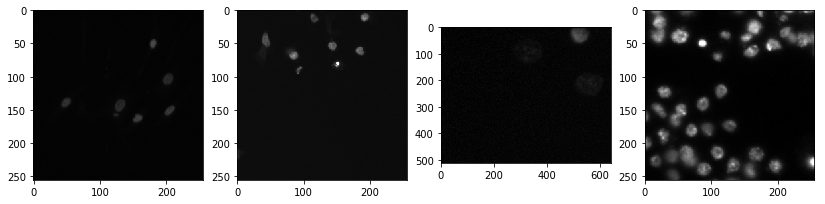

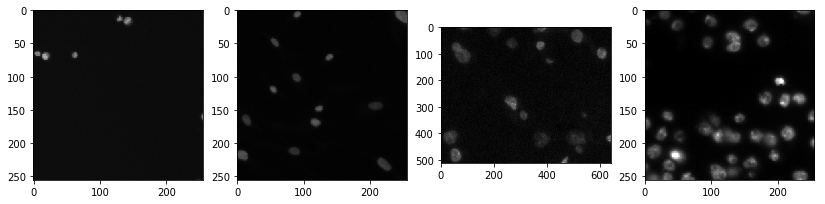

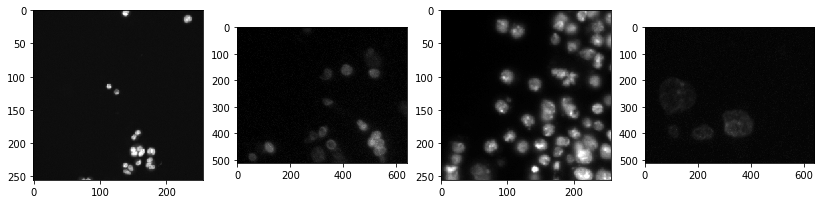

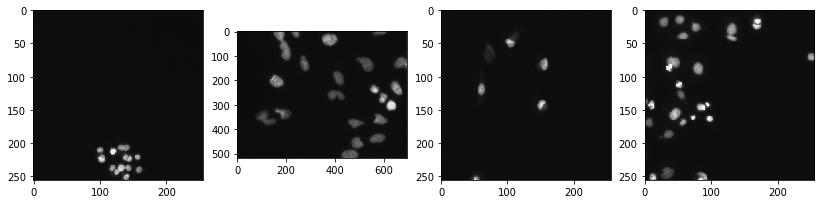

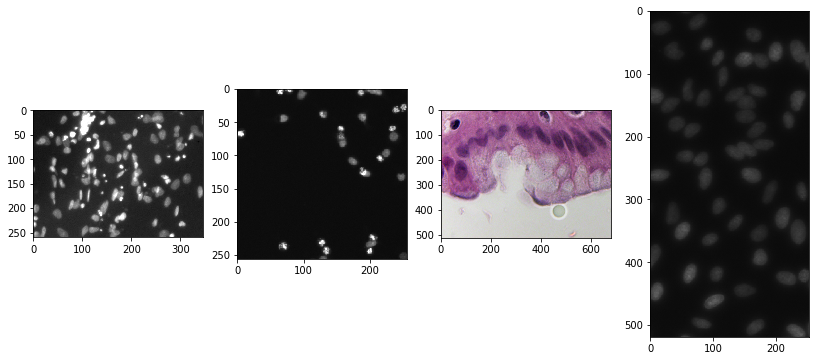

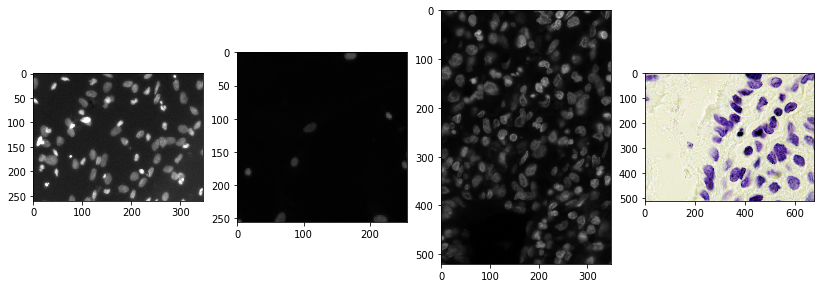

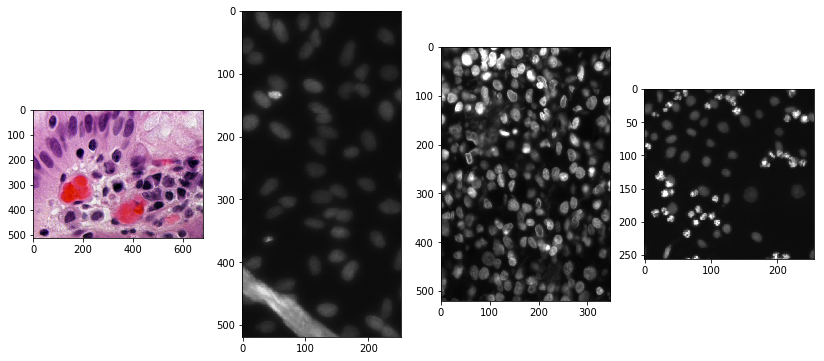

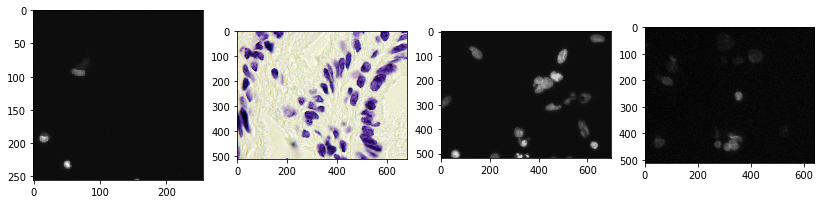

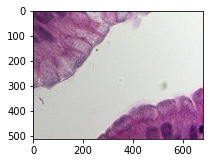

In [140]:
dsutil.multi_imshow(tests)